# Visual-Social CNN Model

## 1 Introduction
This notebook is used to perform dimensionality reduction on the input features, and build, train and evaluate the VSCNN model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
# import tensorflow as tf

/home/allen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2 Workflow
The workflow of this activity is as follows.
- Data Preparation
- Dimensionality Reduction
- Model Building
- Model Training
- Model Evaluation

## 3 Data Preparation

In [2]:
# Loading VGG-19 image features
vgg19_features = np.load('vgg19_features_20%.npy')
vgg19_features

array([[2.7530962e-01, 0.0000000e+00, 4.9113296e-04, ..., 1.3348418e-01,
        7.1556407e-01, 0.0000000e+00],
       [8.5240042e-01, 5.9496824e-02, 1.3975760e-02, ..., 1.0932244e-01,
        9.3736887e-01, 0.0000000e+00],
       [2.9872966e-01, 0.0000000e+00, 1.1461298e-01, ..., 0.0000000e+00,
        9.1342962e-01, 0.0000000e+00],
       ...,
       [7.6310253e-01, 0.0000000e+00, 1.5789582e-01, ..., 1.0257700e-02,
        7.6832259e-01, 0.0000000e+00],
       [3.1485158e-01, 0.0000000e+00, 1.4158221e-01, ..., 1.1133389e-01,
        7.2390568e-01, 0.0000000e+00],
       [3.9134219e-01, 0.0000000e+00, 4.5967326e-03, ..., 0.0000000e+00,
        1.0647962e+00, 0.0000000e+00]], dtype=float32)

In [3]:
vgg19_features.shape

(54650, 512)

In [4]:
# Loading social features
social_features = pd.read_json('social_data_sample_20%.json')
social_features.head()

,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,Geoaccuracy,Category,Concept,Subcategory,img_path,label,TitleLen,TagNum,DaysSinceFirstPhoto,DayOfWeek,Month,Time,City,Country
0,3175@N73,999,1,0,8,0,0,Entertainment,rnb,Music,train/3175@N73/16586.jpg,9.67,22,46,1173,Friday,July,Afternoon,Unknown,Unknown
1,3175@N73,20032,1,0,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16587.jpg,8.85,22,46,1700,Friday,July,Afternoon,Unknown,Unknown
2,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16588.jpg,8.67,22,46,1163,Friday,July,Afternoon,Unknown,Unknown
3,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16589.jpg,8.61,22,46,1163,Friday,July,Afternoon,Unknown,Unknown
4,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16590.jpg,9.00,22,46,1163,Friday,July,Afternoon,Unknown,Unknown


In [5]:
social_features.shape

(54650, 20)

In [6]:
# Dropping extraneous variables
social_features = social_features.drop(columns=['timezone_timezone_id','img_path'])

In [7]:
# Fixing data types of variables
social_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54650 entries, 0 to 54649
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Uid                  54650 non-null  object 
 1   photo_count          54650 non-null  int64  
 2   ispro                54650 non-null  int64  
 3   canbuypro            54650 non-null  int64  
 4   timezone_offset      54650 non-null  int64  
 5   Geoaccuracy          54650 non-null  int64  
 6   Category             54650 non-null  object 
 7   Concept              54650 non-null  object 
 8   Subcategory          54650 non-null  object 
 9   label                54650 non-null  float64
 10  TitleLen             54650 non-null  int64  
 11  TagNum               54650 non-null  int64  
 12  DaysSinceFirstPhoto  54650 non-null  int64  
 13  DayOfWeek            54650 non-null  object 
 14  Month                54650 non-null  object 
 15  Time                 54650 non-null  obje

In [8]:
# Converting some categorical variables to numeric variables to reduce the dimensionality of the dataset
social_features['DayOfWeek'].value_counts()

DayOfWeek
Saturday     12517
Sunday        9809
Friday        8416
Thursday      7202
Monday        5593
Wednesday     5571
Tuesday       5542
Name: count, dtype: int64

In [9]:
social_features['DayOfWeek'] = social_features['DayOfWeek'].map({
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
})

In [10]:
social_features['DayOfWeek'].value_counts()

DayOfWeek
5    12517
6     9809
4     8416
3     7202
0     5593
2     5571
1     5542
Name: count, dtype: int64

In [11]:
social_features['Month'].value_counts()

Month
February     8400
January      7310
December     7098
October      6299
November     4566
September    4297
August       3888
July         3684
June         3399
May          2909
March        1588
April        1212
Name: count, dtype: int64

In [12]:
social_features['Month'] = social_features['Month'].map({
    'January': 0,
    'February': 1,
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11
})
social_features['Month'].dtype

dtype('int64')

In [13]:
social_features['Month'].value_counts()

Month
1     8400
0     7310
11    7098
9     6299
10    4566
8     4297
7     3888
6     3684
5     3399
4     2909
2     1588
3     1212
Name: count, dtype: int64

In [14]:
social_features['Time'].value_counts()

Time
Morning      20304
Night        17712
Afternoon    12115
Evening       4519
Name: count, dtype: int64

In [15]:
social_features['Time'] = social_features['Time'].map({
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
})

social_features['Time'].dtype

dtype('int64')

In [16]:
social_features['Time'].value_counts()

Time
0    20304
3    17712
1    12115
2     4519
Name: count, dtype: int64

In [17]:
# Obtaining dummy variables from categorical variables
social_features_dummies = pd.get_dummies(social_features)
social_features_dummies.shape

(54650, 5053)

In [18]:
social_features_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54650 entries, 0 to 54649
Columns: 5053 entries, photo_count to Country_대한민국
dtypes: bool(5041), float64(1), int64(11)
memory usage: 268.1 MB


In [19]:
# Splitting the data into train and test sets
social_train, social_test, vgg19_train, vgg19_test = train_test_split(social_features_dummies,vgg19_features,test_size=0.2,random_state=1,stratify=social_features['Uid'])

In [20]:
for x in [social_train, social_test, vgg19_train, vgg19_test]:
    print(x.shape)

(43720, 5053)
(10930, 5053)
(43720, 512)
(10930, 512)


In [21]:
# Extracting the response variable from the datasets
y_train = social_train['label']
y_test = social_test['label']

In [22]:
social_train = social_train.drop(columns='label')
social_test = social_test.drop(columns='label')

## 4 Dimensionality Reduction

### 4.1 Social Features

In [23]:
# Obtaining principal components of social features
pca = IncrementalPCA(batch_size=1024)
pca.fit(social_train)

IncrementalPCA(batch_size=1024)

/tmp/ipykernel_64264/4099540559.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


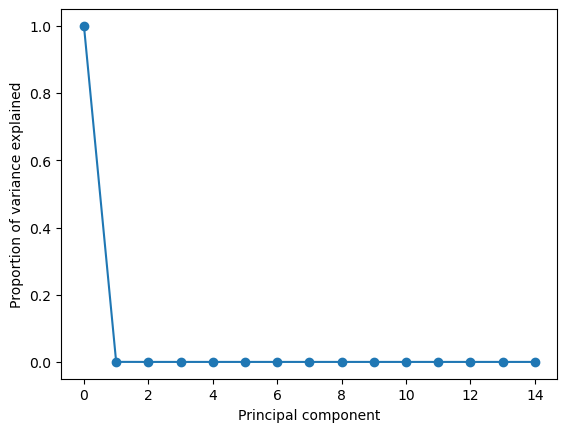

In [24]:
# Creating a scree plot
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_[:15], 'o-')
ax.set_xlabel('Principal component')
ax.set_ylabel('Proportion of variance explained')
fig.show()

In [25]:
pca.explained_variance_ratio_[:14].sum()*100

99.99999996869931

Although the first principal component explains almost all the variance, we will use 14 principal components, which together explain 99.9% of the variance.

In [26]:
social_train_reduced = pca.transform(social_train)[:,:14]
social_test_reduced = pca.transform(social_test)[:,:14]
print(social_train_reduced.shape)
print(social_test_reduced.shape)

(43720, 14)
(10930, 14)


In [27]:
np.save('social_train_reduced.npy',social_train_reduced)
np.save('social_test_reduced.npy',social_test_reduced)

### 4.2 Image Features

In [28]:
# Obtaining principal components of image features
pca = IncrementalPCA()
pca.fit(vgg19_train)

IncrementalPCA()

/tmp/ipykernel_64264/3115495777.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


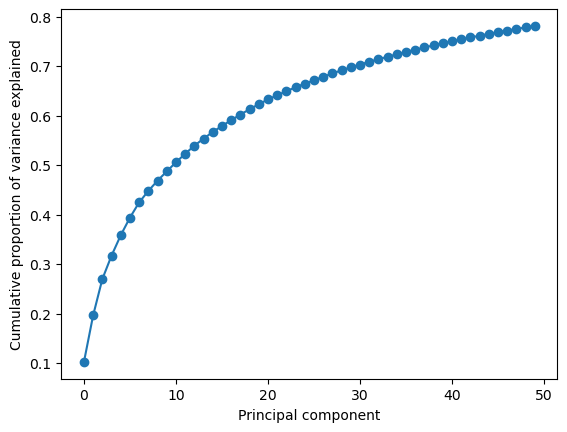

In [29]:
# Creating a scree plot
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_.cumsum()[:50], 'o-')
ax.set_xlabel('Principal component')
ax.set_ylabel('Cumulative proportion of variance explained')
fig.show()

In [30]:
# Obtaining the index of the principal component that explains at least 80% of the variance
np.argmax(pca.explained_variance_ratio_.cumsum()>0.80)

56

Thus, we will use 57 principal components that explain over 80% of the variance.

In [31]:
vgg19_train_reduced = pca.transform(vgg19_train)[:,:57]
vgg19_test_reduced = pca.transform(vgg19_test)[:,:57]
print(vgg19_train_reduced.shape)
print(vgg19_test_reduced.shape)

(43720, 57)
(10930, 57)


In [32]:
np.save('vgg19_train_reduced.npy',vgg19_train_reduced)
np.save('vgg19_test_reduced.npy',vgg19_test_reduced)

## 5 Building the VSCNN Model

def 